# Vehicle Detection

### import Libraries

In [1]:
### import libraries
import os

### Core
import numpy as np
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

### Deep Learning
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras import callbacks
from tensorflow.keras.utils import to_categorical

### Visualization
import matplotlib.pyplot as plt
import plotly.express as px

### Load Data

In [2]:
%%time

categories = {"vehicles":1, "non-vehicles":0}

images = []
target = []

# cycle through labels
for label in os.listdir("data"):
    
    # get label directory
    imagedir = os.path.join("data", label)
    label_value = categories[label]
    print(f"label: {label}, value: {label_value}, imagedir: {imagedir}")
    
    # get images from each label directory
    for image in os.listdir(imagedir):
        imagepath = os.path.join(imagedir, image)
        img = plt.imread(imagepath)
        resized_img = resize(img, (64,64,3))
        images.append(resized_img)
        target.append(label_value)


label: non-vehicles, value: 0, imagedir: data\non-vehicles
label: vehicles, value: 1, imagedir: data\vehicles
CPU times: total: 5.17 s
Wall time: 1min 56s


### Explore Data

In [3]:
n_classes = 2 
classes = ["Vehicles","Non-Vehicles"]
class_distribution = [sum(target), len(target) - sum(target)]

plt.figure(figsize = (8,6))
fig = px.pie(names = classes, 
             values = class_distribution, 
             title = "Class Distribution",
             color_discrete_sequence = px.colors.qualitative.Vivid
            )
fig.update_layout({'title':{'x':0.5}})
# fig.write_image('../images/piechart_class.png', format = 'png') # takes forever to write -- manually save image
fig.show()

<Figure size 576x432 with 0 Axes>

In [4]:
X = np.array(images)
y = np.array(target)

X, y = shuffle(X, y, random_state=0)

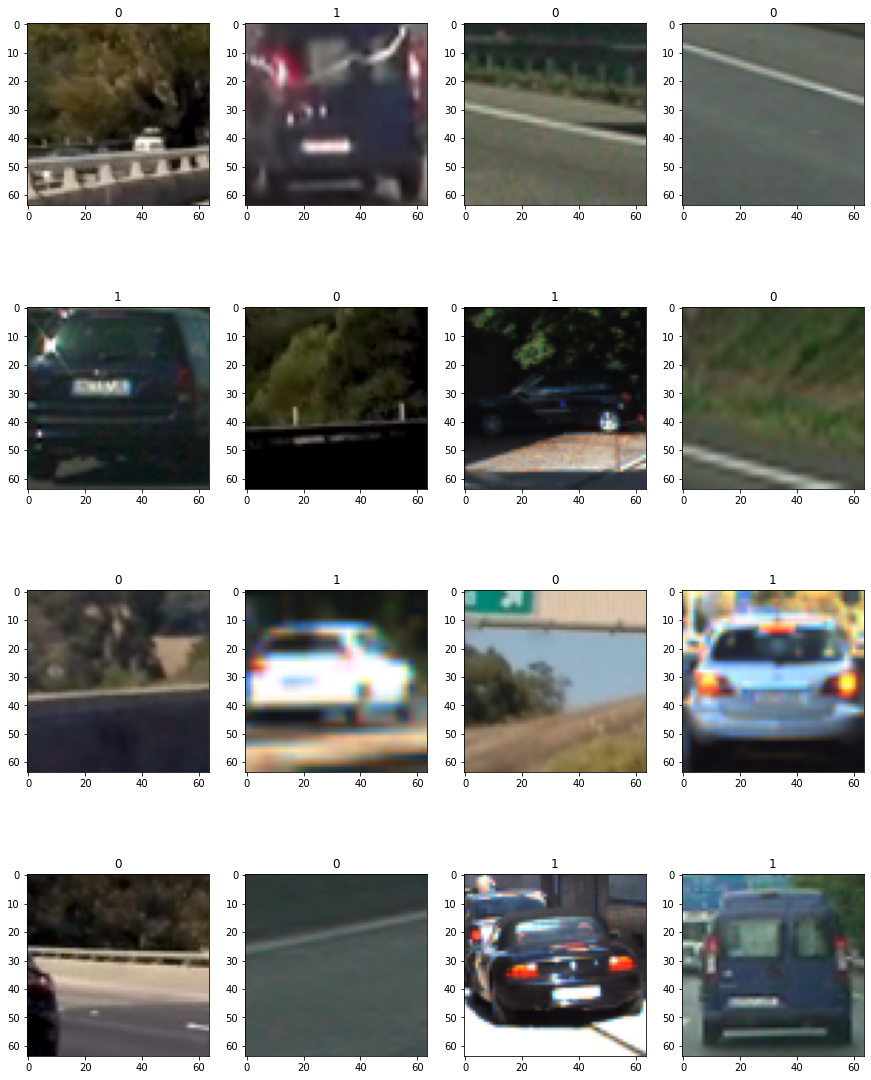

In [5]:
np.random.seed(1)

plt.figure(figsize = (15,20))

for i in range(1,17):
    image = X[i]
    label = y[i]
    plt.subplot(4,4,i)
    plt.imshow(image)
    plt.title(label)
    
plt.show()

In [6]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [7]:
print(f"Shape X_train: {X_train.shape}")
print(f"Shape y_train: {y_train.shape}")
print(f"Shape X_test: {X_test.shape}")
print(f"Shape y_test: {y_test.shape}")

Shape X_train: (14208, 64, 64, 3)
Shape y_train: (14208,)
Shape X_test: (3552, 64, 64, 3)
Shape y_test: (3552,)


### Build Model

In [8]:
model_name = "Vehicle_Detection"

# Begin Model Sequence
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5), activation='relu', input_shape = X_train[0].shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

# Flatten
model.add(Flatten())

# Dense layers
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(2,activation = 'softmax'))

# Compile Model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Callbacks
CB = [
    callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    callbacks.ModelCheckpoint(model_name + ".h5", save_best_only=True)
]

In [9]:
history = model.fit(X_train,y_train_one_hot, epochs = 50, callbacks = CB, validation_split = 0.2)

Epoch 1/50
356/356 [==============================] - 22s 61ms/step - loss: 0.2615 - accuracy: 0.8948 - val_loss: 0.1257 - val_accuracy: 0.9514
Epoch 2/50
356/356 [==============================] - 22s 61ms/step - loss: 0.0952 - accuracy: 0.9684 - val_loss: 0.0602 - val_accuracy: 0.9792
Epoch 3/50
356/356 [==============================] - 22s 62ms/step - loss: 0.0545 - accuracy: 0.9819 - val_loss: 0.1147 - val_accuracy: 0.9536
Epoch 4/50
356/356 [==============================] - 22s 62ms/step - loss: 0.0428 - accuracy: 0.9858 - val_loss: 0.0506 - val_accuracy: 0.9810
Epoch 5/50
356/356 [==============================] - 22s 62ms/step - loss: 0.0401 - accuracy: 0.9871 - val_loss: 0.0806 - val_accuracy: 0.9669
Epoch 6/50
356/356 [==============================] - 22s 61ms/step - loss: 0.0469 - accuracy: 0.9833 - val_loss: 0.0383 - val_accuracy: 0.9877
Epoch 7/50
356/356 [==============================] - 22s 61ms/step - loss: 0.0273 - accuracy: 0.9911 - val_loss: 0.0653 - val_accuracy:

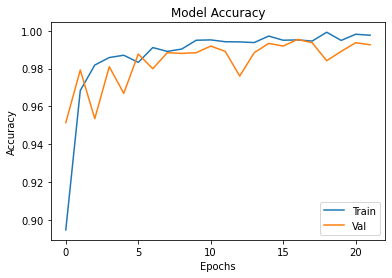

In [10]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel('Epochs')
plt.legend(['Train','Val'])
plt.show()

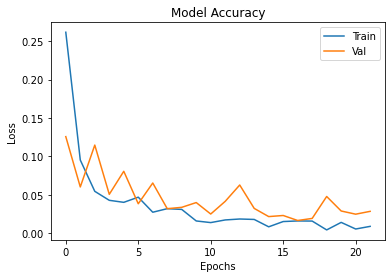

In [11]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.plot(loss)
plt.plot(val_loss)
plt.title("Model Accuracy")
plt.ylabel("Loss")
plt.xlabel('Epochs')
plt.legend(['Train','Val'])
plt.show()

### Test Model

In [12]:
model = keras.models.load_model("Vehicle_Detection.h5")

test_accuracy = model.evaluate(X_test,y_test_one_hot)[1]
test_accuracy = '%.3f'%test_accuracy
print(f"Testing Accuracy: {test_accuracy}")

111/111 [==============================] - 1s 11ms/step - loss: 0.0249 - accuracy: 0.9935
Testing Accuracy: 0.994
